<a href="https://colab.research.google.com/github/Kevin-2003/WasteDetection/blob/main/yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/YOLOV5/

/content/drive/MyDrive/YOLOV5


In [ ]:
# !git clone https://github.com/ultralytics/yolov5
# %cd yolov5
# %pip install -qr requirements.txt
# %pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output

In [ ]:
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.2.1+cu121 (Tesla T4)


In [ ]:
# set up environment
# os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
# from roboflow import Roboflow
# rf = Roboflow(model_format="yolov5", notebook="ultralytics")

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QXCmqvbLYNmx8DrSBr3B")
project = rf.workspace("jakob-kruijer").project("yolov5.taco")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset.location = '/content/drive/MyDrive/YOLOV5/yolov5/YOLOv5.TACO-1'

In [ ]:
%cd yolov5

/content/drive/MyDrive/YOLOV5/yolov5


In [ ]:
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

  Using cached ultralytics-8.2.8-py3-none-any.whl (755 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cac

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source {dataset.location}/valid/images

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
# Choose the correct exp folder - see prev output block
for imageName in glob.glob('/content/drive/MyDrive/YOLOV5/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    i += 1

    if i < 8:
      display(Image(filename=imageName))
      print("\n")

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

In [ ]:
%cd /content/yolov5/

/content/yolov5


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source /content/final_straw.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/final_straw.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/final_straw.jpg: 416x288 2 Cartons, 46.1ms
Speed: 0.4ms pre-process, 46.1ms inference, 531.6ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp4


In [ ]:
display(Image('/content/drive/MyDrive/YOLOV5/yolov5/runs/detect/exp4/final_straw.jpg'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %cp -r /content/drive/MyDrive/IoT/datasets /content/datasets
%cp -r /content/drive/MyDrive/IoT/yolov5 /content/yolov5/

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source /content/combo2.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/combo2.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/combo2.jpg: 416x320 1 Bottle cap, 1 Bottle, 1 Can, 88.1ms
Speed: 0.6ms pre-process, 88.1ms inference, 518.8ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp5


In [ ]:
display(Image('/content/drive/MyDrive/YOLOV5/yolov5/runs/detect/exp5/combo2.jpg'))

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source /content/plastic_bottle2.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/plastic_bottle2.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/plastic_bottle2.jpg: 256x416 1 Bottle cap, 1 Plastic bag - wrapper, 45.7ms
Speed: 0.4ms pre-process, 45.7ms inference, 495.2ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp8


In [ ]:
display(Image('/content/drive/MyDrive/YOLOV5/yolov5/runs/detect/exp8/plastic_bottle2.jpg'))

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source {dataset.location}/valid/images

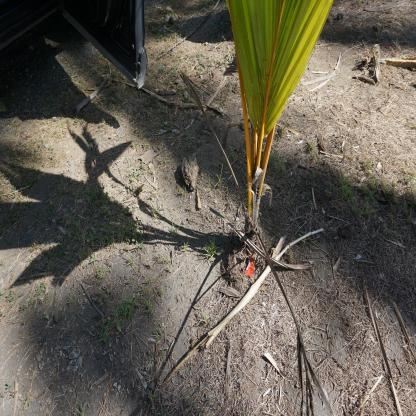

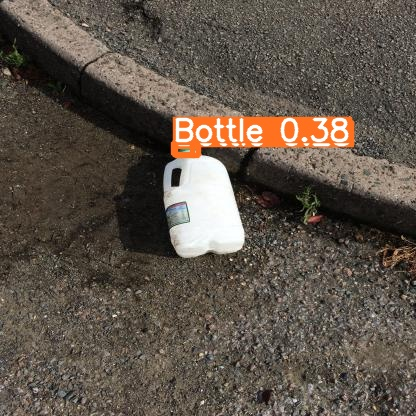

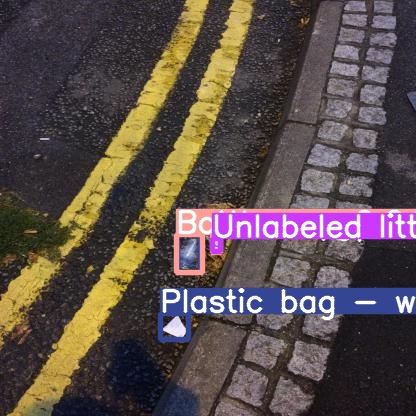

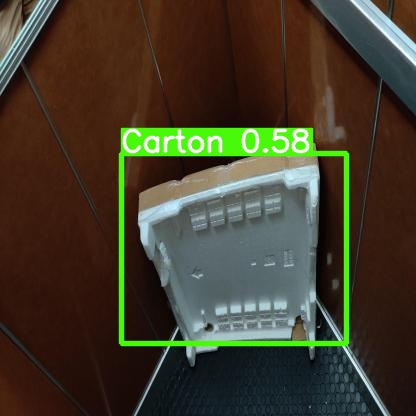

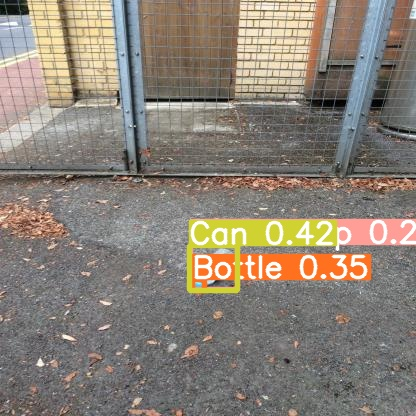

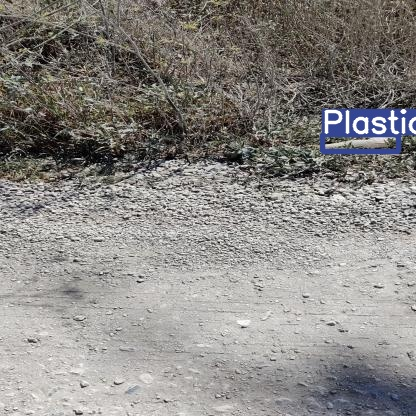

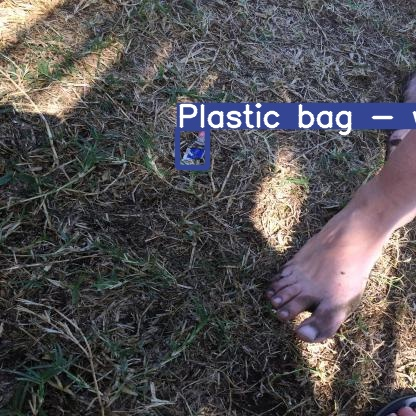

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
# Choose the correct exp folder - see prev output block
for imageName in glob.glob('/content/drive/MyDrive/YOLOV5/yolov5/runs/detect/exp9/*.jpg'): #assuming JPG
    i += 1

    if i < 8:
      display(Image(filename=imageName))
      print("\n")

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source /content/plastic.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/plastic.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/plastic.jpg: 416x320 1 Bottle cap, 1 Carton, 51.5ms
Speed: 0.4ms pre-process, 51.5ms inference, 558.1ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp10


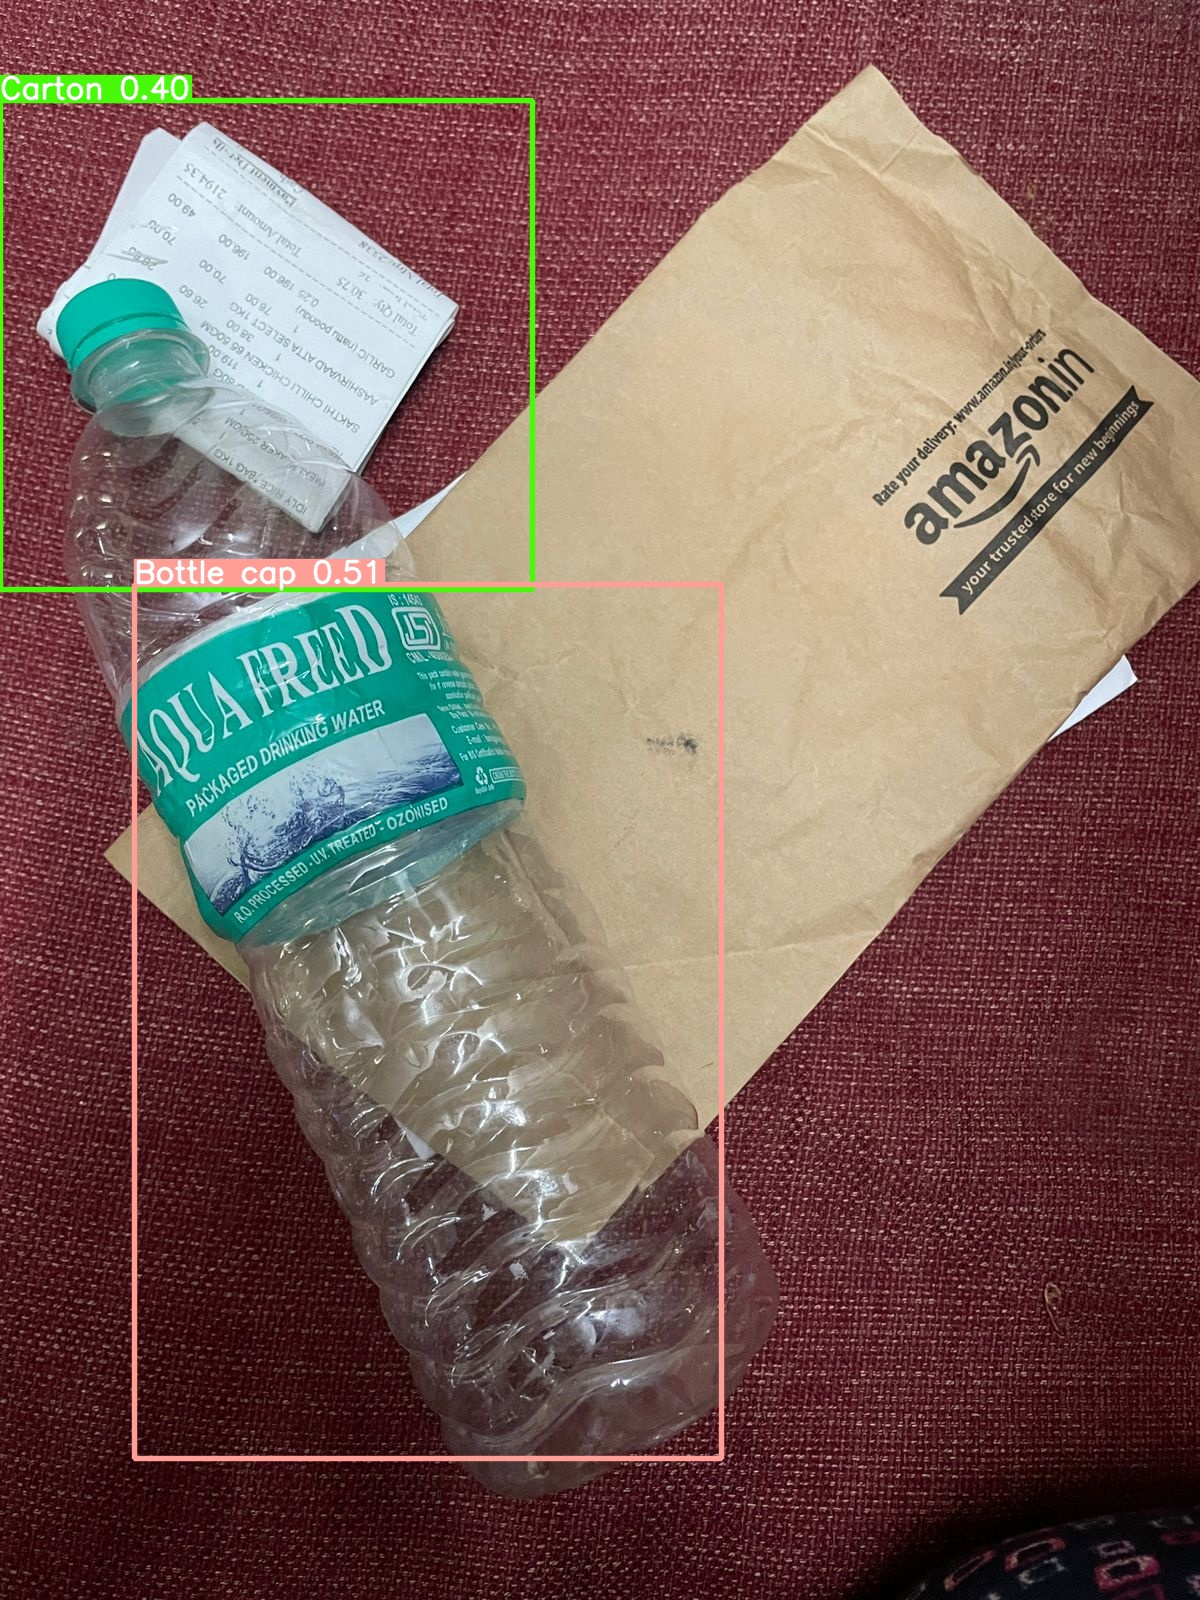

In [ ]:
display(Image('/content/drive/MyDrive/YOLOV5/yolov5/runs/detect/exp10/plastic.jpg'))

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source /content/plastic2.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/plastic2.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/plastic2.jpg: 416x416 1 Bottle cap, 1 Bottle, 32.6ms
Speed: 0.6ms pre-process, 32.6ms inference, 839.9ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp11


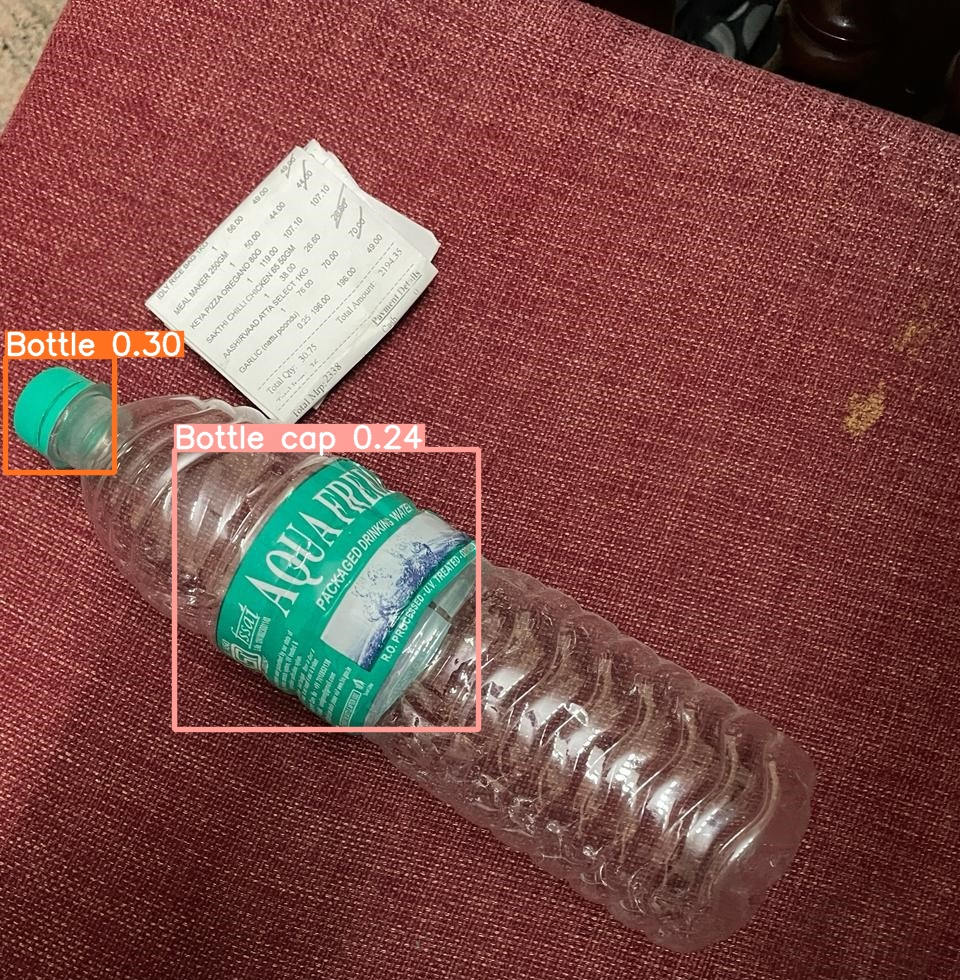

In [ ]:
display(Image('/content/drive/MyDrive/YOLOV5/yolov5/runs/detect/exp11/plastic2.jpg'))

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source /content/combo2.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/combo2.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/combo2.jpg: 416x320 1 Bottle cap, 1 Bottle, 1 Can, 50.1ms
Speed: 0.4ms pre-process, 50.1ms inference, 486.9ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp14


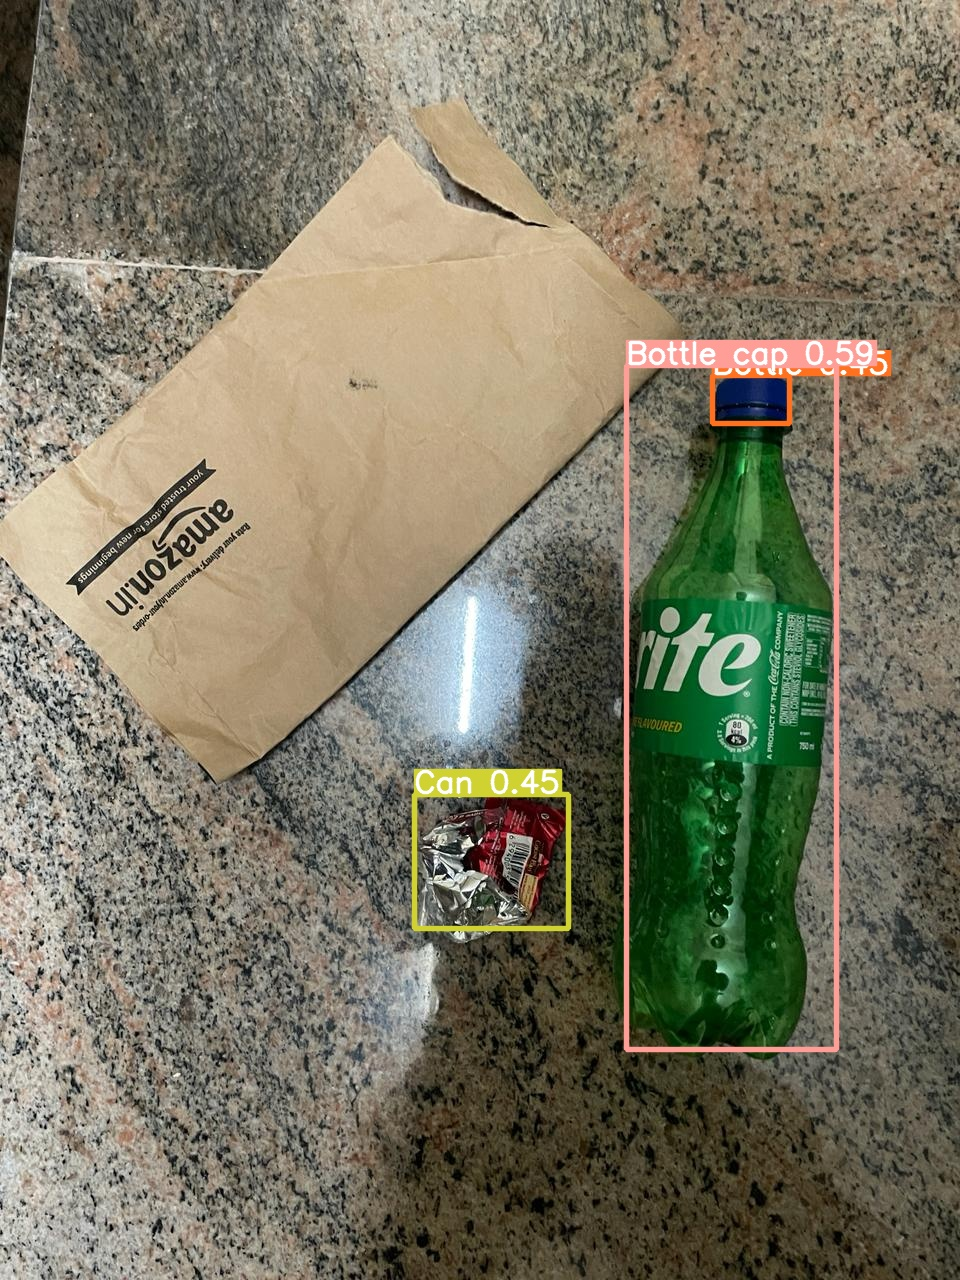

In [ ]:
display(Image('/content/drive/MyDrive/YOLOV5/yolov5/runs/detect/exp14/combo2.jpg'))

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source /content/cover.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/cover.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/cover.jpg: 416x320 2 Plastic bag - wrappers, 54.8ms
Speed: 0.4ms pre-process, 54.8ms inference, 771.6ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp15


In [ ]:
display(Image('/content/drive/MyDrive/YOLOV5/yolov5/runs/detect/exp15/cover.jpg'))

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source /content/cover2.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/cover2.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/cover2.jpg: 416x320 2 Bottle caps, 2 Cartons, 3 Plastic bag - wrappers, 50.2ms
Speed: 0.4ms pre-process, 50.2ms inference, 478.6ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp16


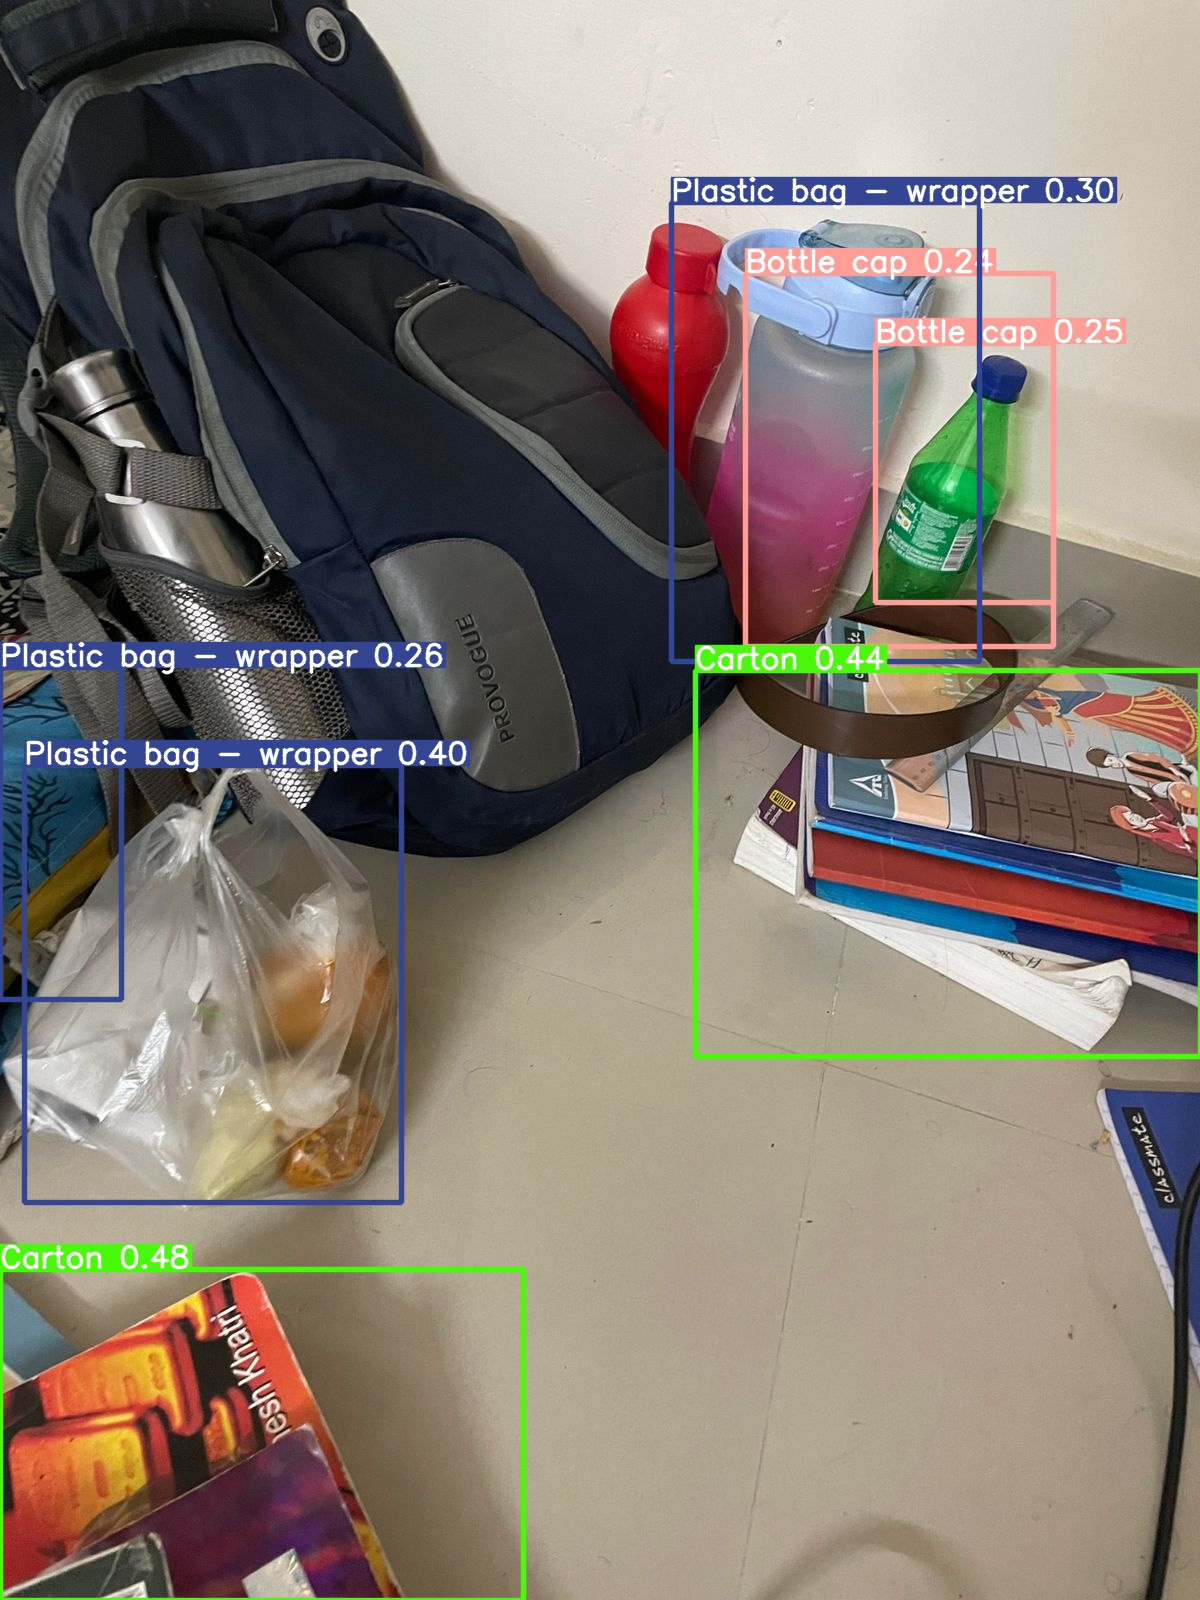

In [ ]:
display(Image('/content/drive/MyDrive/YOLOV5/yolov5/runs/detect/exp16/cover2.jpg'))